In [47]:
import os
import glob
import sys

import ast
from pathlib import Path
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Add the parent directory to the system path

                coordinates  riv_order  upland_drainage_area
0    (-70.58552, -12.90615)          5               421.831
1  (-70.472921, -13.014572)          6                31.999
2  (-70.356254, -12.916085)          3             18873.940
3    (-70.49878, -12.76038)          5               779.017
4  (-70.394983, -12.609206)          3             28420.791


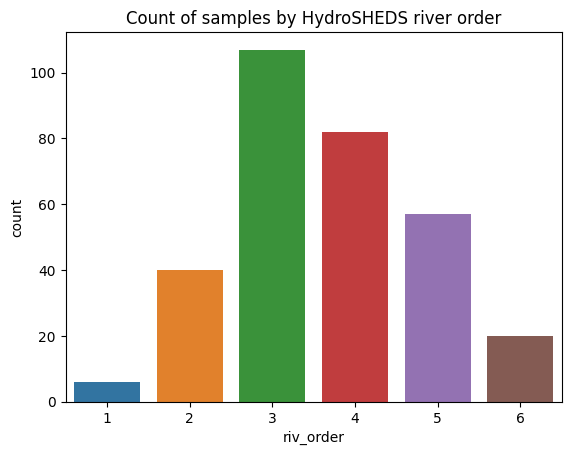

In [38]:
points_path = Path('/exports/csce/datastore/geos/users/s2135982/rivertools/mlfluv/Amazon_HydroSHEDS_river_networks/network_sediment_rich_sample.csv')
# points_path = Path('/exports/csce/datastore/geos/users/s2135982/rivertools/mlfluv/Amazon_HydroSHEDS_river_networks/network_da_order_sample_12000_RANDOM.csv')
# points_path = Path('/exports/csce/datastore/geos/users/s2135982/rivertools/mlfluv/Amazon_HydroSHEDS_river_networks/network_da_order_sample_12000_STRATIFIED.csv')

df = pd.read_csv(points_path)
print(df.head(5))

# For sediment rich samples, uncomment the following 4 lines 
# the coordinates are stored as a string, so it needs to be convert to a tupple of float first 
df['coordinates'] = df['coordinates'].apply(lambda x: ast.literal_eval(x))
df['x'] = df['coordinates'].apply(lambda x: x[0])
df['y'] = df['coordinates'].apply(lambda x: x[1])

sns.countplot(x='riv_order', data=df)
plt.title('Count of samples by HydroSHEDS river order')
plt.show()

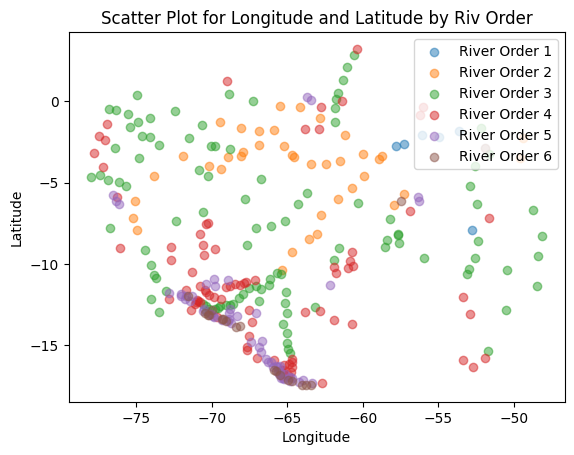

In [39]:
# Get unique 'riv_order' values
riv_orders = sorted(df['riv_order'].unique())

# Create a scatter plot for each 'riv_order' value
for riv_order in riv_orders:
    subset = df[df['riv_order'] == riv_order]
    plt.scatter(subset['x'], subset['y'], alpha=0.5, label=f'River Order {riv_order}')

plt.title('Scatter Plot for Longitude and Latitude by Riv Order')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

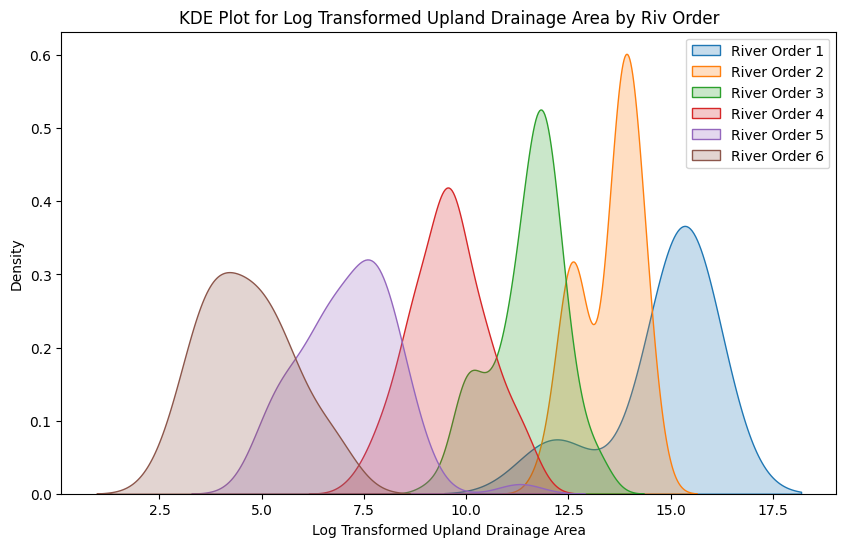

In [40]:
plt.figure(figsize=(10, 6))

# Create a KDE plot for each 'riv_order' value
for riv_order in riv_orders:
    subset = df[df['riv_order'] == riv_order]
    sns.kdeplot(np.log(subset['upland_drainage_area']), label=f'River Order {riv_order}', fill=True)

plt.title('KDE Plot for Log Transformed Upland Drainage Area by Riv Order')
plt.xlabel('Log Transformed Upland Drainage Area')
plt.ylabel('Density')
plt.legend()
plt.show()


In [60]:
data_path = '/exports/csce/datastore/geos/groups/LSDTopoData/MLFluv/mlfluv_s12lulc_data' #_RANDOM'
# data_path = '/exports/csce/datastore/geos/users/s2135982/MLFLUV_DATA/data_sediment_rich_samples'
# data_path = Path('/exports/csce/datastore/geos/groups/LSDTopoData/MLFluv/mlfluv_s12lulc_data_water_from_sediment_rich_sample')
folder_list = os.listdir(data_path)
print(len(folder_list))
meta_files = glob.glob(os.path.join(data_path, '**/*meta.csv'), recursive=True)
print(len(meta_files))

# Create an empty list to hold dataframes
dfs = []
# Loop over the list of csv files
for file in meta_files:
    # Read each csv file into a DataFrame and append to the list
    dfs.append(pd.read_csv(file))

# Concatenate all dataframes in the list into a single dataframe
df = pd.concat(dfs, ignore_index=True)

2516
2516


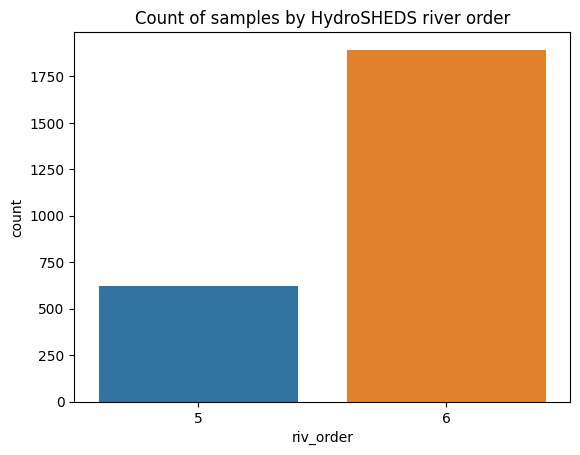

In [61]:
# For sediment rich samples, uncomment the following 4 lines 
# the coordinates are stored as a string, so it needs to be convert to a tupple of float first 
df['point'] = df['point'].apply(lambda x: ast.literal_eval(x))
df['x'] = df['point'].apply(lambda x: x[0])
df['y'] = df['point'].apply(lambda x: x[1])

sns.countplot(x='riv_order', data=df)
plt.title('Count of samples by HydroSHEDS river order')
plt.show()

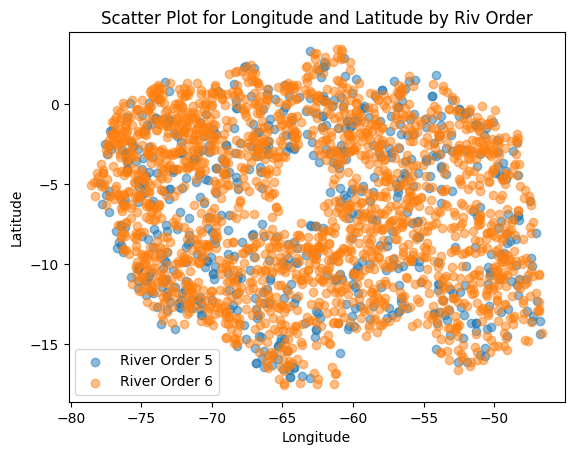

In [62]:
# Get unique 'riv_order' values
riv_orders = sorted(df['riv_order'].unique())

# Create a scatter plot for each 'riv_order' value
for riv_order in riv_orders:
    subset = df[df['riv_order'] == riv_order]
    plt.scatter(subset['x'], subset['y'], alpha=0.5, label=f'River Order {riv_order}')

plt.title('Scatter Plot for Longitude and Latitude by Riv Order')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

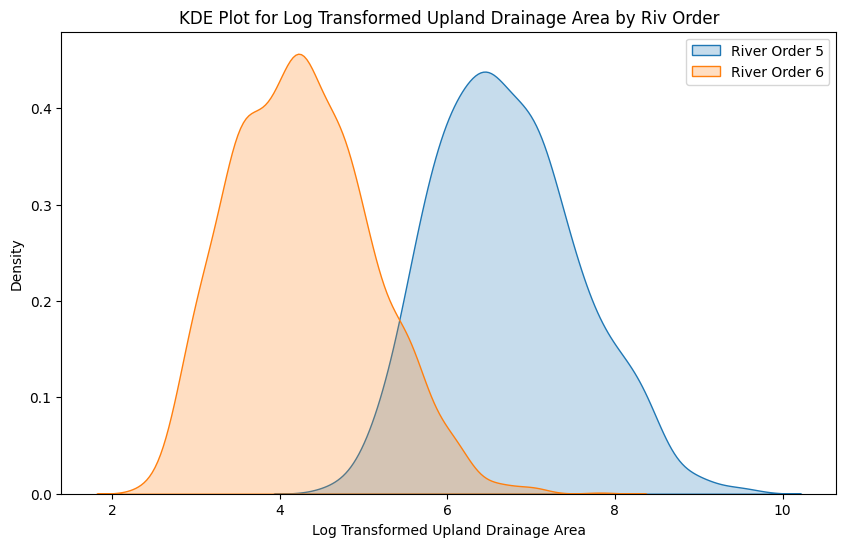

In [63]:
plt.figure(figsize=(10, 6))

# Create a KDE plot for each 'riv_order' value
for riv_order in riv_orders:
    subset = df[df['riv_order'] == riv_order]
    sns.kdeplot(np.log(subset['drainage_area']), label=f'River Order {riv_order}', fill=True)

plt.title('KDE Plot for Log Transformed Upland Drainage Area by Riv Order')
plt.xlabel('Log Transformed Upland Drainage Area')
plt.ylabel('Density')
plt.legend()
plt.show()
